### Author : Sibonelo Ngobese
### Run this script using Python 3.x
### Date : 31 July 2018

In [1]:
# 1.
!python.exe --version
# Import relevant libraries
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import train_test_split

Python 3.6.6 :: Anaconda custom (64-bit)


#### Firstly use pandas to open this dataset

In [2]:
# 2.
# Firstly, Open the CSV file
open_csv = pd.read_csv("assessment_data.csv")

In [3]:
# 3.
# See the first rows
open_csv.head()

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,bigollo-16,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,cantor-33,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,cantor-33,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,cantor-33,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,cantor-33,blue,25.0000,1,sigma,204.415716


#### Is there any interesting stats?

In [4]:
# 4.
# The describe function
open_csv.describe()

,target_var,feature_1,feature_2,feature_3,feature_6,feature_7,feature_9
count,1309.000000,1308.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,0.381971,33.295479,0.385027,0.498854,29.881135,2.294882,101.794120
std,0.486055,51.758668,0.865560,1.041658,14.413500,0.837836,50.890853
min,0.000000,0.000000,0.000000,0.000000,0.166700,1.000000,-93.974333
25%,0.000000,7.895800,0.000000,0.000000,21.000000,2.000000,68.550768
50%,0.000000,14.454200,0.000000,0.000000,28.000000,3.000000,102.039185
75%,1.000000,31.275000,0.000000,1.000000,39.000000,3.000000,135.175053
max,1.000000,512.329200,9.000000,8.000000,80.000000,3.000000,264.692290


###### Seems like it was pointless to perform decribe on this dataset, since no useful information received from this except that we have 1310 entries/rows. Continuing:

#### Some simple Exploratory Data Analysis (EDA)

In [5]:
# 5.

# Value counts on feature 3? 
open_csv.feature_3.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: feature_3, dtype: int64

In [6]:
# 6. 
# Now try feature 4
open_csv.feature_4.value_counts()

fermat          8
cantor-34       6
bigollo-68      5
germain-17      5
cantor-33       4
fermat-15       4
fermat-13       4
cantor-89       4
fermat-44       4
bigollo-107     4
descrates       4
bigollo-69      3
euler-112       3
allen-45        3
euler-45        3
cantor-112      3
bigollo-62      3
cantor-18       2
cantor-79       2
euler-44        2
bigollo-46      2
cantor-42       2
cantor-94       2
descrates-46    2
descrates-48    2
descrates-26    2
cantor-43       2
descrates-30    2
euler-78        2
euler-57        2
               ..
allen-16        1
allen-30        1
bigollo-41      1
cantor-110      1
allen-27        1
euler-88        1
allen-20        1
cantor-143      1
descrates-54    1
descrates-33    1
cantor-60       1
euler-69        1
cantor-81       1
cantor-116      1
euler-71        1
allen-40        1
allen-34        1
fermat-49       1
descrates-17    1
bigollo-21      1
euler-21        1
euler-28        1
allen-42        1
descrates-49    1
bigollo-93

In [7]:
# 7.
open_csv.feature_4.unique()

array(['bigollo-16', 'cantor-33', 'euler-23', 'descrates-18', 'allen-47',
       'cantor-112', nan, 'cantor-73', 'bigollo-46', 'allen-34',
       'bigollo-69', 'descrates-26', 'cantor-17', 'descrates-46',
       'cantor-159', 'cantor-108', 'bigollo-60', 'cantor-110', 'cantor-63',
       'turing', 'allen-42', 'cantor-18', 'cantor-114', 'descrates-33',
       'euler-44', 'allen-32', 'bigollo-21', 'bigollo-15', 'euler-51',
       'bigollo-49', 'euler-35', 'bigollo-62', 'bigollo-107', 'cantor-57',
       'euler-42', 'euler-19', 'bigollo-72', 'bigollo-88', 'allen-20',
       'cantor-100', 'allen-25', 'euler-69', 'euler-60', 'euler-63',
       'euler-56', 'bigollo-33', 'bigollo-37', 'cantor-96', 'euler-28',
       'bigollo-82', 'bigollo-31', 'allen-45', 'cantor-97', 'allen-27',
       'allen-31', 'allen-29', 'cantor-65', 'cantor-56', 'descrates-31',
       'allen-40', 'cantor-106', 'euler-36', 'cantor-122', 'cantor-34',
       'euler-47', 'descrates-45', 'descrates-51', 'bigollo-50',
       

In [8]:
# 8.
open_csv.feature_5.value_counts()

pink    843
blue    466
Name: feature_5, dtype: int64

In [9]:
# 9.
open_csv.feature_7.value_counts()

3    709
1    323
2    277
Name: feature_7, dtype: int64

In [10]:
# 10.
open_csv.feature_8.value_counts()

sigma    914
gamma    270
qoph     123
Name: feature_8, dtype: int64

In [11]:
# 11.
# Create a copy to work with
X = open_csv.copy()

# Save and drop labels
y = open_csv.target_var
X = X.drop('target_var', axis=1)

# fill NANs. I am well aware that this messes with 
# the original "form"/integrity of the data.
X = X.fillna(-999)
# This is the only type of pruning we will apply.

In [12]:
# 12.
# Label encoder
for c in open_csv.columns[open_csv.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    # This loop encodes all the categorical row entries with a value 
    # this makes it easier to apply any type of training on the dataset.

In [13]:
# 13.
# now lets use train_test_split to avoid overfitting
# Shuffle is left as default value = True to train on randomized 80% of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234, shuffle=True)
# we use the same seed to keep the realizations the same if the randomforest is ran again

####   Create the model : Random forest: 
It is a member of ensemble methods meaning it improves the predecessor method, in this case  a Decision Tree.
This approach was chosen in order to drill down each feature this is why all feature columns (1-9) were used. 
Only 80 % of the data was used as training data. 

In [14]:
# 14.
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
# 15.
y_pred = rfmodel.predict(X_test)

In [16]:
# 16.
# Check if this has correct number of entries? 
assert len(y_pred) == len(y_test)

In [17]:
# 17.
# Place the predictions of the test data in a Pandas data frame
rf_df_with_answers = pd.DataFrame({'y_pred': y_pred, 'y_true':y_test.values})

In [18]:
# 18.
# Sanity check
rf_df_with_answers.head()

,y_pred,y_true
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [19]:
# 19.
# Now get indexes for the all predictions made 
# Only the ones that cost the company a lot of money
# Get the incorrect ones versus the correct predictions

rf_df_with_answers_ = rf_df_with_answers.copy()
no_loss = []
loss_R1000 = []
loss_R20000 = []
index_1 = []
index_2 = [] 
index_3 = [] 

# loop over all test indices
for i in range(len(y_test.values)):
    # This loops over all predictions that are "Correct"
    if int(rf_df_with_answers_.y_true[i]) == int(rf_df_with_answers_.y_pred[i]):
            no_loss.append("no_loss") 
            index_1.append(i)
    
    # This following "else if" and else loop over all predictions that are "Incorrect"        
    elif int(rf_df_with_answers_.y_true[i]) == 1 and int(rf_df_with_answers_.y_pred[i]) == 0:
            loss_R20000.append("lost_R20000") 
            index_2.append(i)
                  
    else:
            loss_R1000.append("lost_R1000") 
            index_3.append(i)
# Save corresponding indices to placeholder arrays            
index_1 = np.array(index_1)
index_2 = np.array(index_2)
index_3 = np.array(index_3)

In [20]:
# 20.
# Create a placeholder for the types of predictions made
# in terms of string format, the way it defined allows saving strings of different lengths
# in respective rows/entries. 
arr = np.array(np.zeros(len(y_test.values)), str) 

arr[index_1] = np.array(no_loss)
arr[index_2] = np.array(loss_R20000)
arr[index_3] = np.array(loss_R1000)

# Add a new column to our answers dataframe
rf_df_with_answers_['cost'] = arr

### RESULTS

In [21]:
# 21. Sanity check?
rf_df_with_answers_.head(30)

,y_pred,y_true,cost
0,0,0,no_loss
1,1,0,lost_R1000
2,0,0,no_loss
3,0,0,no_loss
4,0,0,no_loss
5,1,1,no_loss
6,0,1,lost_R20000
7,1,1,no_loss
8,0,0,no_loss
9,1,1,no_loss


In [22]:
# 22.
rf_df_with_answers_.cost.value_counts()

no_loss        213
lost_R20000     29
lost_R1000      20
Name: cost, dtype: int64

#### So according to the Random forest classifier only:

In [23]:
# 23.
print("{} Predictions resulted with a No loss to the company,".format(rf_df_with_answers_.cost.value_counts()[0]))
print("while {} Predictions cost the company R 20 000,".format(rf_df_with_answers_.cost.value_counts()[1]))
print("and {} Predictions cost the company R 1 000.".format(rf_df_with_answers_.cost.value_counts()[2]))

213 Predictions resulted with a No loss to the company,
while 29 Predictions cost the company R 20 000,
and 20 Predictions cost the company R 1 000.


### Save the model to disk

In [24]:
# 24.
# saving model for future use?
from sklearn.externals import joblib
rf_filename = 'rf_model.sav'
joblib.dump(rfmodel, open(rf_filename, 'wb'))

#### Let us investigate the score or accuracy of the RF model

In [25]:
# 25.
# load the model from disk
rf_loaded_model = joblib.load(rf_filename)
rf_result = rf_loaded_model.score(X_test, y_test)
print("The accuracy of RandomForestClassifier: ", rf_result)

The accuracy of RandomForestClassifier:  0.812977099237


In [26]:
# 26.
from sklearn import metrics

### Further analysis:  graphic?
Let's plot the the confusion matrix


In [27]:
# 27.

names = ["No loss", "Losses"]
target_names =  ['class {}({})'.format(clsnum, clsname) for clsnum, clsname in enumerate(names)]

print(metrics.classification_report(y_test, y_pred,target_names=target_names))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

                  precision    recall  f1-score   support

class 0(No loss)       0.83      0.88      0.85       163
 class 1(Losses)       0.78      0.71      0.74        99

     avg / total       0.81      0.81      0.81       262



In [28]:
# @hidden_cell

# 28.
# Create a function for plotting the confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

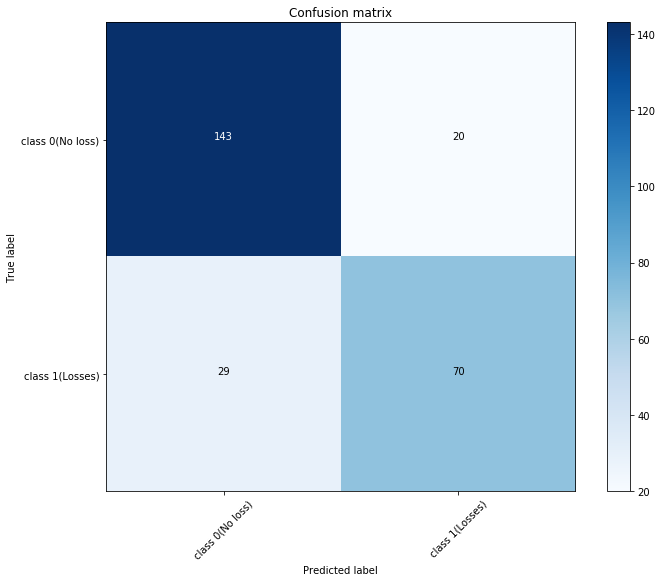

In [29]:
# 29.
plt.figure(figsize=(10, 8))

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

### Conclusion

From the analysis done above one can see that: The Random Forest classifier which is an example from ensemble methods was not bad at all. The target variable is binary in nature so that is why an extension of a Decision tree model was used. I defined a prediction of 1 when a 1 was expected as a "No loss" same applies for a prediction of 0. If the predictions do not match, i referred to that as a "Loss" So though the labelling might cause "confusion" (no pun intended) to some a reader the off diagonal entries are the incorrectly classified predictions while on the diagonal represent the correct predictions. The confusion matrix still supports the results obtain above in cell with comment number 23. I was not able to figure out what each feature represent though (and the target variable). 